In [242]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [243]:
with open("all_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,New Listings Mom,New Listings Yoy,Number of Records,Price Drops,Price Drops Mom,Price Drops Yoy,Sold Above List,Sold Above List Mom,Sold Above List Yoy,Date
0,Studio,2011,03,1097.5,2011,03,382800.0,37,33,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-01
1,Studio,2011,04,1095.0,2011,04,373500.0,33,22,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-01
2,Studio,2011,05,1025.0,2011,05,368400.0,33,25,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01
3,Studio,2011,06,995.0,2011,06,359300.0,27,23,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01
4,Studio,2011,07,1000.0,2011,07,365300.0,36,25,22,...,67.50%,-16.20%,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01


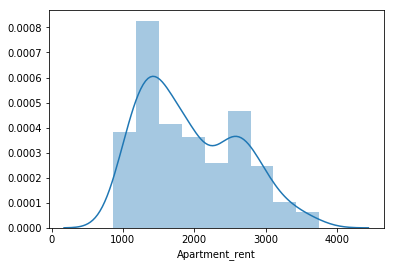

In [244]:
sns.distplot(merge_housing.Apartment_rent)

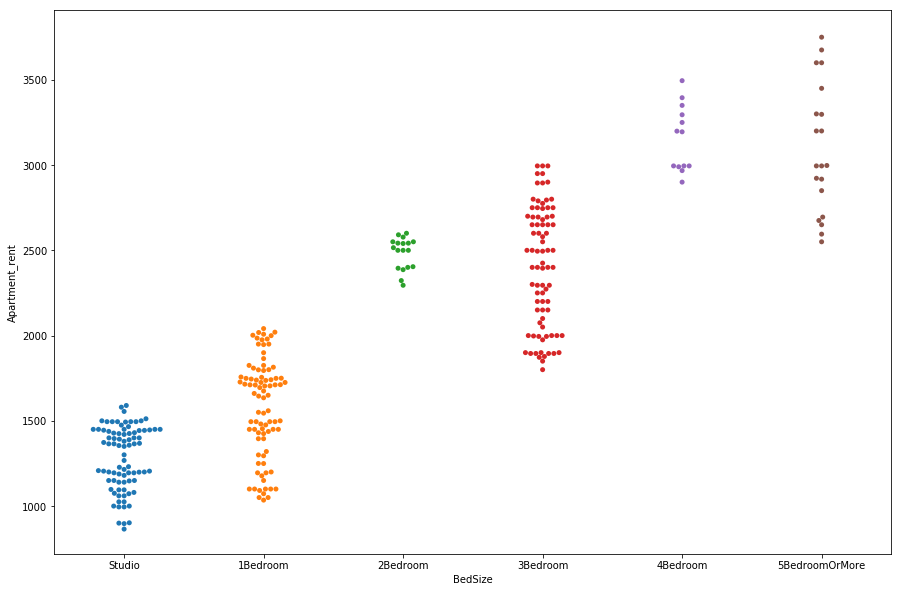

In [245]:
plt.subplots(figsize=(15,10))
sns.swarmplot(x=merge_housing['BedSize'], y=merge_housing['Apartment_rent'], data=merge_housing)

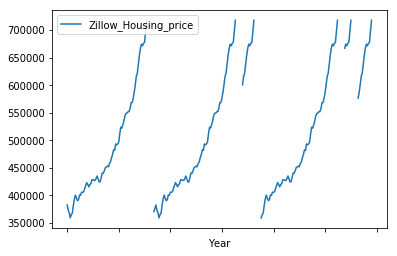

In [246]:
merge_housing.plot.line(x='Year', y='Zillow_Housing_price')

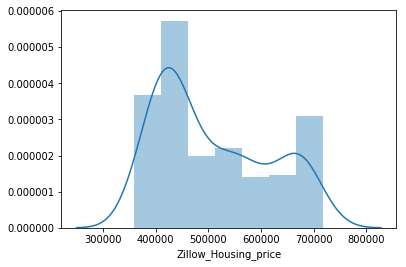

In [247]:
sns.distplot(merge_housing.Zillow_Housing_price.dropna())

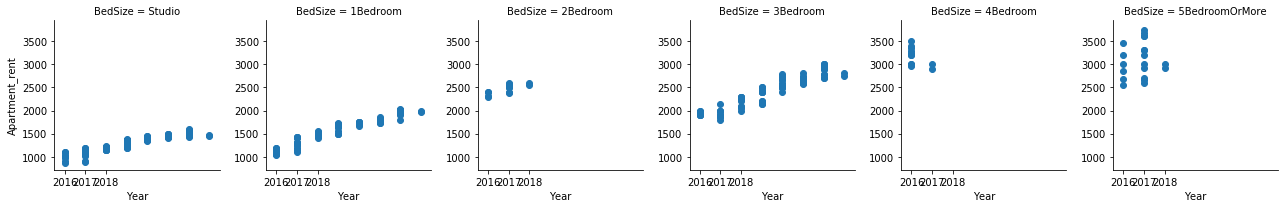

In [248]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(merge_housing, col='BedSize')
g.map(plt.scatter, 'Year', "Apartment_rent")



In [249]:
merge_housing['Year'].value_counts()

2017    71
2016    46
2013    36
2015    36
2014    36
2012    36
2011    29
2018    12
Name: Year, dtype: int64

In [250]:
merge_housing['BedSize'].value_counts()

1Bedroom          86
Studio            84
3Bedroom          81
5BedroomOrMore    20
2Bedroom          18
4Bedroom          13
Name: BedSize, dtype: int64

In [251]:
#df_apartment_bedSize = pd.get_dummies(merge_housing['BedSize'])
#zillow_apartment_df_new = pd.concat([merge_housing, df_apartment_bedSize], axis=1)


In [252]:
# Get Average
zillow_apartment_grouped_df = merge_housing
zillow_apartment_grouped_df.groupby(['BedSize', 'Year', 'Month'], as_index=False)['Apartment_rent'].agg('mean')
zillow_apartment_grouped_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,New Listings Mom,New Listings Yoy,Number of Records,Price Drops,Price Drops Mom,Price Drops Yoy,Sold Above List,Sold Above List Mom,Sold Above List Yoy,Date
0,Studio,2011,03,1097.5,2011,03,382800.0,37,33,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-01
1,Studio,2011,04,1095.0,2011,04,373500.0,33,22,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-01
2,Studio,2011,05,1025.0,2011,05,368400.0,33,25,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01
3,Studio,2011,06,995.0,2011,06,359300.0,27,23,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01
4,Studio,2011,07,1000.0,2011,07,365300.0,36,25,22,...,67.50%,-16.20%,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01


In [253]:
studio_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == 'Studio']
oneBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '1Bedroom']
twoBed_df = zillow_apartment_grouped_df.loc[zillow_apartment_grouped_df['BedSize'] == '2Bedroom']

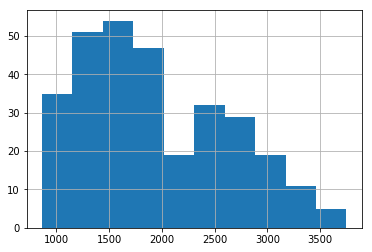

In [254]:
merge_housing['Apartment_rent'].hist()

In [255]:
studio_df['Year'].value_counts()

2015    12
2014    12
2017    12
2013    12
2016    12
2012    12
2011    10
2018     2
Name: Year, dtype: int64

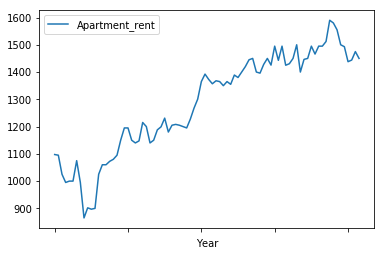

In [256]:
studio_df.plot.line(x='Year', y='Apartment_rent')

In [257]:
studio_df[studio_df.Apartment_rent < 1200]

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,New Listings Mom,New Listings Yoy,Number of Records,Price Drops,Price Drops Mom,Price Drops Yoy,Sold Above List,Sold Above List Mom,Sold Above List Yoy,Date
0,Studio,2011,03,1097.5,2011,03,382800.0,37,33,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-01
1,Studio,2011,04,1095.0,2011,04,373500.0,33,22,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-01
2,Studio,2011,05,1025.0,2011,05,368400.0,33,25,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01
3,Studio,2011,06,995.0,2011,06,359300.0,27,23,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-01
4,Studio,2011,07,1000.0,2011,07,365300.0,36,25,22,...,67.50%,-16.20%,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01
5,Studio,2011,08,1000.0,2011,08,367900.0,36,24,22,...,20.30%,-11.20%,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01
6,Studio,2011,09,1075.0,2011,09,381900.0,38,28,22,...,28.60%,-6.40%,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,3.70%,-8.10%,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,3.90%,4.80%,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01
9,Studio,2011,12,902.0,2011,12,395100.0,45,29,26,...,-6.30%,-6.80%,1.0,0.279230,0.020045,-0.042252,0.303323,0.010828,0.144919,2011-12-01


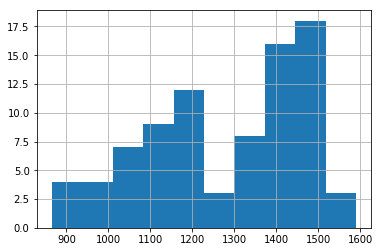

In [258]:
studio_df['Apartment_rent'].hist()

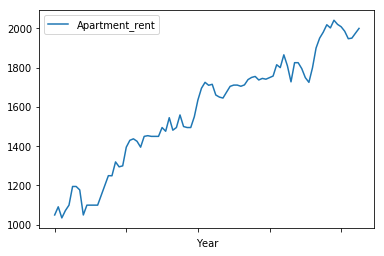

In [259]:
oneBed_df.plot.line(x='Year', y='Apartment_rent')

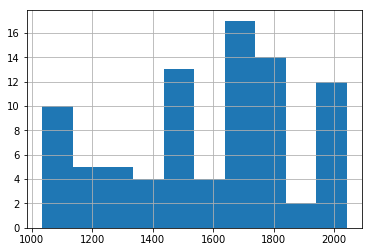

In [260]:
oneBed_df['Apartment_rent'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


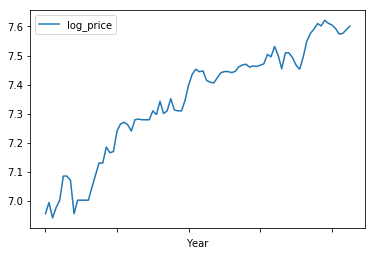

In [261]:
oneBed_df['log_price'] = np.log(oneBed_df['Apartment_rent'])
oneBed_df.plot.line(x='Year', y='log_price')

In [262]:
oneBed_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,New Listings Yoy,Number of Records,Price Drops,Price Drops Mom,Price Drops Yoy,Sold Above List,Sold Above List Mom,Sold Above List Yoy,Date,log_price
84,1Bedroom,2011,01,1050.0,2011,01,370800.0,48,27,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01,6.956545
85,1Bedroom,2011,02,1091.5,2011,02,376000.0,46,32,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-01,6.995308
86,1Bedroom,2011,03,1035.0,2011,03,382800.0,37,33,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-01,6.942157
87,1Bedroom,2011,04,1072.5,2011,04,373500.0,33,22,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-01,6.977748
88,1Bedroom,2011,05,1100.0,2011,05,368400.0,33,25,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-01,7.003065


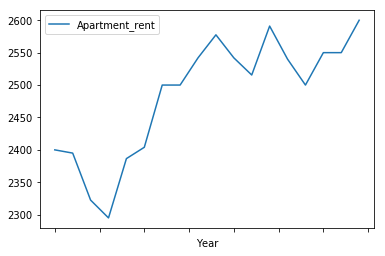

In [263]:
twoBed_df.plot.line(x='Year', y='Apartment_rent')

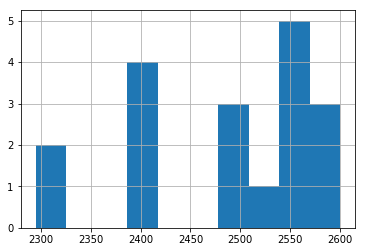

In [264]:
twoBed_df['Apartment_rent'].hist()

In [265]:
merge_housing_dropNa = merge_housing.dropna()
merge_housing_dropNa.Search_Count_SeattleRent = merge_housing_dropNa.Search_Count_SeattleRent.astype(int)
merge_housing_dropNa.Search_Count_SeattleHousing = merge_housing_dropNa.Search_Count_SeattleHousing.astype(int)
merge_housing_dropNa.Search_Count_seattleApartment = merge_housing_dropNa.Search_Count_seattleApartment.astype(int)

merge_housing_dropNa.dtypes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


BedSize                                  object
Year                                     object
Month                                    object
Apartment_rent                          float64
Shift_Year                               object
Shift_Month                              object
Zillow_Housing_price                    float64
Search_Count_SeattleRent                  int64
Search_Count_SeattleHousing               int64
Search_Count_seattleApartment             int64
Avg Sale To List                        float64
Avg Sale To List Mom                     object
Avg Sale To List Yoy                     object
Homes Sold                               object
Homes Sold Mom                           object
Homes Sold Yoy                           object
Inventory                                object
Inventory Mom                            object
Inventory Yoy                            object
Median Dom                              float64
Median Dom Mom                          

In [266]:
# Plot all of the variable-to-variable relations as scatterplots
#pd.scatter_matrix(merge_housing_dropNa.iloc[:, -5:-1], figsize=(12,8), s=10);

In [267]:
#merge_housing_dropNa.dtypes

In [268]:
studio_index = studio_df.set_index('Date')
studio_index.head()
y = studio_index.Apartment_rent
y.index.name = 'Date'
y.head()


Date
2011-03-01    1097.5
2011-04-01    1095.0
2011-05-01    1025.0
2011-06-01     995.0
2011-07-01    1000.0
Name: Apartment_rent, dtype: float64

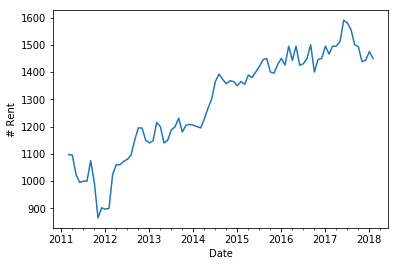

In [269]:
ax = y.plot();
ax.set_ylabel('# Rent');

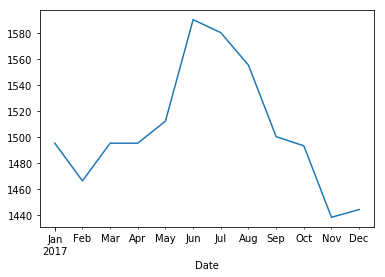

In [270]:
y.loc['2017-01-01':'2017-12-01'].plot();


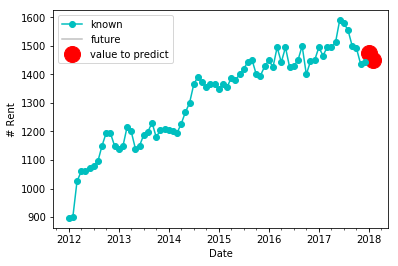

In [272]:
known = y.loc['2012-01-01':'2017-12-01']
unknown = y.loc['2018-01-01':'2018-12-01']
to_predict = y.loc['2018-01-01':'2018-12-01']

fig, ax = plt.subplots();
known.plot(ax=ax, c='c', marker='o', zorder=3);
unknown.plot(ax=ax, c='grey', alpha=0.5);
to_predict.plot(ax=ax, c='r', marker='o', markersize=16,
                linestyle='');

ax.legend(['known', 'future', 'value to predict']);
ax.set_ylabel(1'# Rent');

In [273]:
known

Date
2012-01-01     897.0
2012-02-01     900.0
2012-03-01    1025.0
2012-04-01    1060.0
2012-05-01    1060.0
2012-06-01    1072.5
2012-07-01    1080.0
2012-08-01    1095.0
2012-09-01    1150.0
2012-10-01    1195.0
2012-11-01    1195.0
2012-12-01    1150.0
2013-01-01    1140.0
2013-02-01    1147.5
2013-03-01    1215.0
2013-04-01    1200.0
2013-05-01    1140.0
2013-06-01    1150.0
2013-07-01    1188.0
2013-08-01    1199.0
2013-09-01    1231.0
2013-10-01    1180.0
2013-11-01    1205.0
2013-12-01    1208.0
2014-01-01    1205.0
2014-02-01    1200.0
2014-03-01    1195.0
2014-04-01    1227.5
2014-05-01    1267.5
2014-06-01    1300.5
               ...  
2015-07-01    1420.0
2015-08-01    1445.0
2015-09-01    1450.0
2015-10-01    1400.0
2015-11-01    1396.0
2015-12-01    1428.0
2016-01-01    1450.0
2016-02-01    1425.5
2016-03-01    1495.0
2016-04-01    1443.0
2016-05-01    1495.0
2016-06-01    1425.0
2016-07-01    1430.5
2016-08-01    1450.0
2016-09-01    1500.0
2016-10-01    1400.0
2016-11-

# Delete